In [15]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import itertools
import seaborn as sns
from keras import models
from keras import layers

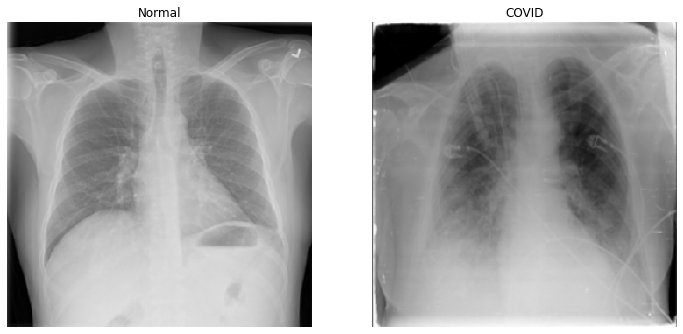

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols=2,figsize=(12,12))
ax_1 = ax[0]
img1 = load_img('data/Normal/Normal-3.png', target_size=(256,256))
ax_1.imshow(img1)
ax_1.axis('off')
ax_1.set_title('Normal')

ax_2 = ax[1]
img2 = load_img('data/COVID/COVID-3.png', target_size=(256,256))
ax_2.imshow(img2)
ax_2.axis('off')
ax_2.set_title('COVID')
plt.show()

## Image Data Generator

In [17]:
images = ImageDataGenerator(rescale=1./255).flow_from_directory(
        directory = 'data',
        class_mode = 'binary',
        color_mode = 'grayscale',
        target_size = (256, 256),
        batch_size = 7232) 

Found 7233 images belonging to 2 classes.


In [18]:
images, labels = next(images)

In [19]:
pd.DataFrame(labels).value_counts()

1.0    3616
0.0    3616
dtype: int64

1.0


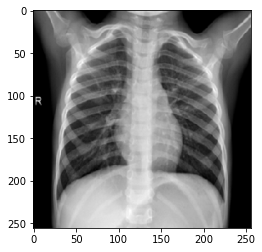

In [20]:
print(labels[0])
plt.imshow(images[0],cmap='gray')

## Train Test Split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.20, random_state = 1)

In [22]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (5785, 256, 256, 1)
y_train shape (5785,)
x_test shape (1447, 256, 256, 1)
y_test shape (1447,)


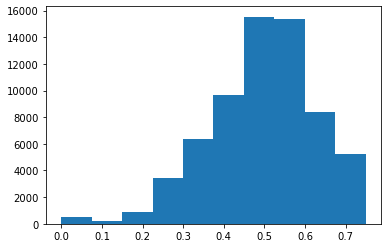

In [23]:
plt.hist(x_train[0].reshape(256*256))
plt.show()

In [24]:
x_train = x_train.reshape(5785, 256*256)
x_test = x_test.reshape(1447, 256*256)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('int')
y_test = y_test.astype('int')

## Sequential Model

In [25]:
model = Sequential()
model.add(Dense(512, input_shape=(256*256,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [26]:
# compiling the sequential model
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [28]:
# Training the model
model1 = model.fit(x_train, y_train,
          batch_size=128, epochs = 20,
          verbose=2,
          validation_data=(x_test, y_test),
                  workers = -1)

Epoch 1/20
46/46 - 11s - loss: 0.5158 - accuracy: 0.7409 - val_loss: 0.4524 - val_accuracy: 0.8182 - 11s/epoch - 229ms/step
Epoch 2/20
46/46 - 9s - loss: 0.4871 - accuracy: 0.7564 - val_loss: 0.5133 - val_accuracy: 0.7678 - 9s/epoch - 192ms/step
Epoch 3/20
46/46 - 9s - loss: 0.4931 - accuracy: 0.7578 - val_loss: 0.4149 - val_accuracy: 0.8258 - 9s/epoch - 189ms/step
Epoch 4/20
46/46 - 9s - loss: 0.4713 - accuracy: 0.7678 - val_loss: 0.4583 - val_accuracy: 0.8003 - 9s/epoch - 192ms/step
Epoch 5/20
46/46 - 9s - loss: 0.5172 - accuracy: 0.7374 - val_loss: 0.4157 - val_accuracy: 0.8258 - 9s/epoch - 190ms/step
Epoch 6/20
46/46 - 9s - loss: 0.4840 - accuracy: 0.7599 - val_loss: 0.4186 - val_accuracy: 0.8252 - 9s/epoch - 191ms/step
Epoch 7/20
46/46 - 9s - loss: 0.4806 - accuracy: 0.7658 - val_loss: 0.4040 - val_accuracy: 0.8238 - 9s/epoch - 192ms/step
Epoch 8/20
46/46 - 9s - loss: 0.4694 - accuracy: 0.7717 - val_loss: 0.3953 - val_accuracy: 0.8300 - 9s/epoch - 193ms/step
Epoch 9/20
46/46 - 9s 

In [29]:
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)
print('Train: ',results_train)
print('Test: ',results_test)

46/46 [==============================] - 1s 28ms/step - loss: 0.3801 - accuracy: 0.8514
Train:  [0.38490062952041626, 0.8395851254463196]
Test:  [0.38010552525520325, 0.8514167070388794]


In [30]:
cm = confusion_matrix(y_test, np.around(model.predict(x_test)).astype('int'))
cm

array([[705,  44],
       [171, 527]])

<AxesSubplot:>

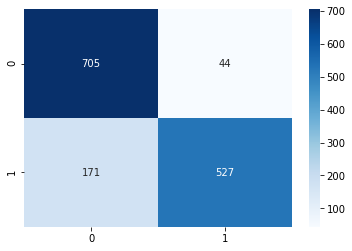

In [31]:
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')

## Convolutional Neural Network

In [32]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.20, random_state = 1)

In [33]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (5785, 256, 256, 1)
y_train shape (5785,)
x_test shape (1447, 256, 256, 1)
y_test shape (1447,)


In [34]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256,1)))
cnn.add(layers.MaxPooling2D((3, 3)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(16, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy',
              optimizer = "Adam",
              metrics=['accuracy'])

In [35]:
cnn1 = cnn.fit(x_train, y_train,
                    epochs=20,
                    batch_size=50,
                    validation_data=(x_test, y_test),
                      workers = -1)

Epoch 1/20
116/116 [==============================] - 104s 884ms/step - loss: 0.5070 - accuracy: 0.7602 - val_loss: 0.3545 - val_accuracy: 0.8549
Epoch 2/20
116/116 [==============================] - 97s 825ms/step - loss: 0.3420 - accuracy: 0.8501 - val_loss: 0.3130 - val_accuracy: 0.8715
Epoch 3/20
116/116 [==============================] - 124s 1s/step - loss: 0.2759 - accuracy: 0.8889 - val_loss: 0.2412 - val_accuracy: 0.9164
Epoch 4/20
116/116 [==============================] - 109s 930ms/step - loss: 0.2484 - accuracy: 0.8996 - val_loss: 0.2283 - val_accuracy: 0.9102
Epoch 5/20
116/116 [==============================] - 92s 795ms/step - loss: 0.2142 - accuracy: 0.9184 - val_loss: 0.2270 - val_accuracy: 0.9150
Epoch 6/20
116/116 [==============================] - 145s 1s/step - loss: 0.1888 - accuracy: 0.9286 - val_loss: 0.1992 - val_accuracy: 0.9281
Epoch 7/20
116/116 [==============================] - 142s 1s/step - loss: 0.1788 - accuracy: 0.9286 - val_loss: 0.2161 - val_accura

In [36]:
results_train = cnn.evaluate(x_train, y_train)
results_test = cnn.evaluate(x_test, y_test)
print('Train: ',results_train)
print('Test: ',results_test)

46/46 [==============================] - 9s 192ms/step - loss: 0.2070 - accuracy: 0.9274
Train:  [0.030310852453112602, 0.9961970448493958]
Test:  [0.2070227563381195, 0.9274360537528992]


In [37]:
cm = confusion_matrix(y_test, np.around(cnn.predict(x_test)).astype('int'))
cm

array([[687,  62],
       [ 43, 655]])

<AxesSubplot:>

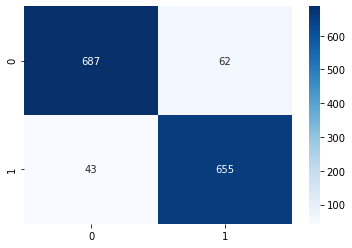

In [38]:
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')